<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polígonos de Voronoi

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection

from matplotlib.patches import Polygon

mpl.rcParams['figure.figsize'] = (14,8)

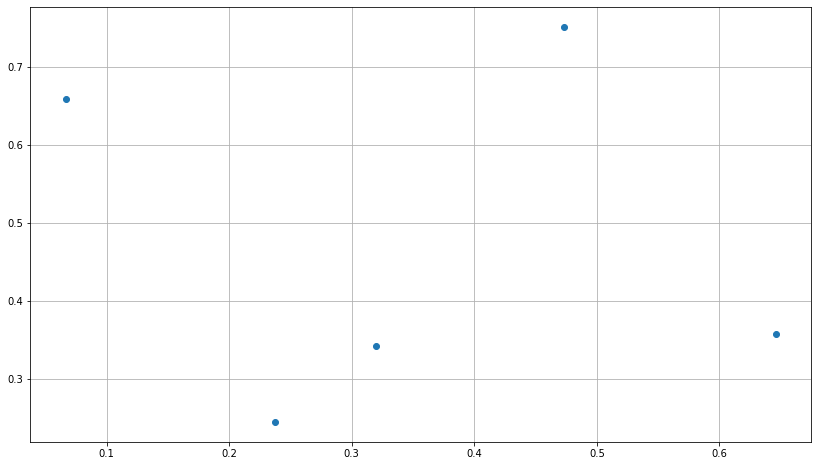

In [2]:
puntos = np.random.rand(5,2)        
plt.scatter(puntos[:,0], puntos[:,1])
plt.grid()

In [3]:
### Create Voronoi object
vor = Voronoi(puntos)

In [4]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)

(4, 2)


In [5]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[1, -1, 0], [-1, 3, 2], [3, 1, 0, 2], [-1, 0, 2], [-1, 1, 3], []]


<Figure size 504x504 with 0 Axes>

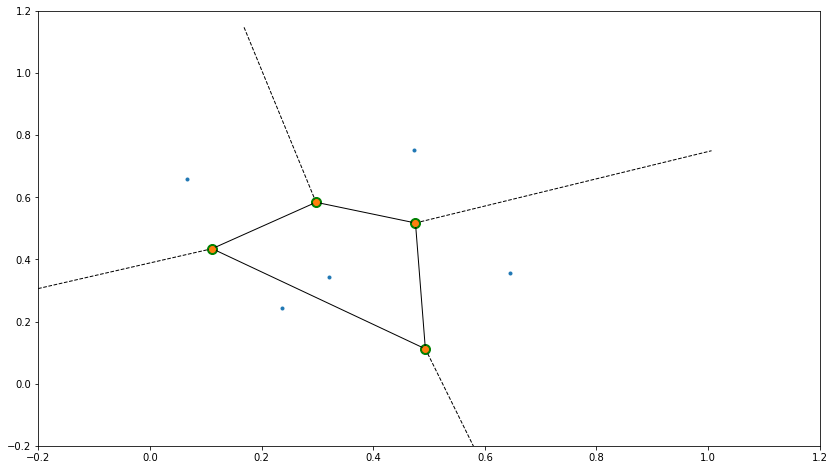

In [6]:
### Use built-in function to plot 
plt.figure(figsize=(7,7))
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.xlim([-0.2,1.2]); plt.ylim([-0.2,1.2])
plt.show()

In [7]:
### Get Voronoi ridge-vertices and ridge-points
print(vor.ridge_vertices)
print(vor.ridge_points)

[[-1, 0], [-1, 1], [0, 1], [2, 3], [-1, 2], [-1, 3], [0, 2], [1, 3]]
[[2 3]
 [2 0]
 [2 1]
 [4 1]
 [4 3]
 [4 0]
 [1 3]
 [1 0]]


Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

:\begin{align}
    \alpha(r, \theta) = r,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

\begin{align}
    x &= r\cos\theta,\quad &y &= r\sin\theta\\
    \Rightarrow r &= \sqrt{x^2+y^2},\quad &\theta &= \arctan\left(\frac{y}{x}\right)
\end{align}

In [8]:
### parámetros
tol = 0.01; n_space = 200
theta = np.linspace(tol, np.pi-tol, n_space);
r = np.array([1.0 + tol, 2.0 - tol]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

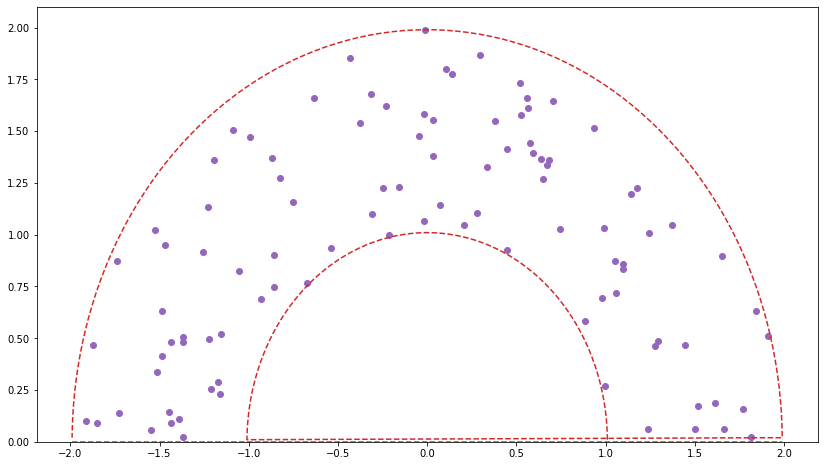

In [9]:
N = 100;
X_border, Y_border = [], []
for i in range(len(r)):
    X_border.append(alpha_x(r[i], theta))
    Y_border.append(alpha_y(r[i], theta))

X_border = np.array(X_border).flatten()
Y_border = np.array(Y_border).flatten()
pts_border = np.array([X_border, Y_border]).T

#----------------------------------------
r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

#----------------------------------------
X_base = np.linspace(-r[1], r[1], n_space).flatten()
Y_base = np.zeros(n_space).flatten()
pts_base = np.array([X_base, Y_base]).T

#----------------------------------------

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X_border, Y_border, "--", color="tab:red");
plt.plot(X_base, Y_base, "--", color="tab:red"); 
plt.ylim([0.0,2.1]); plt.show()

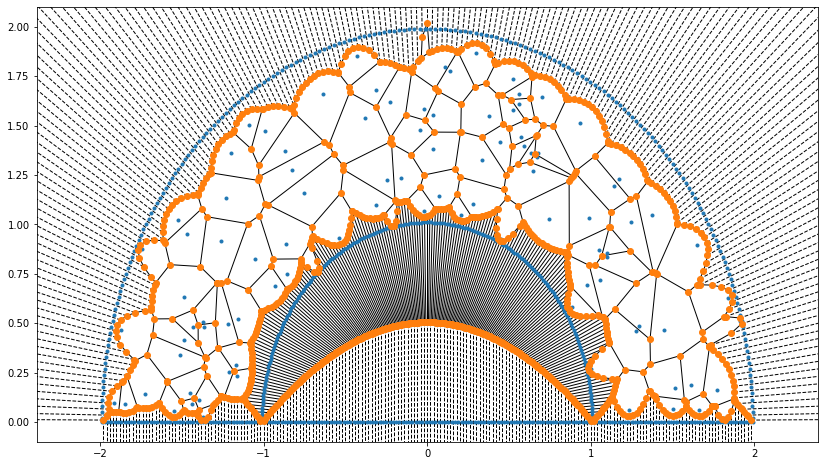

<Figure size 1080x504 with 0 Axes>

In [10]:
total = np.concatenate((pts_border, pts_rand, pts_base))
vor = Voronoi(total)
vor_vertices = vor.vertices
vor_regions = vor.regions

voronoi_plot_2d(vor)
plt.ylim([-0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

(-0.1, 2.0)

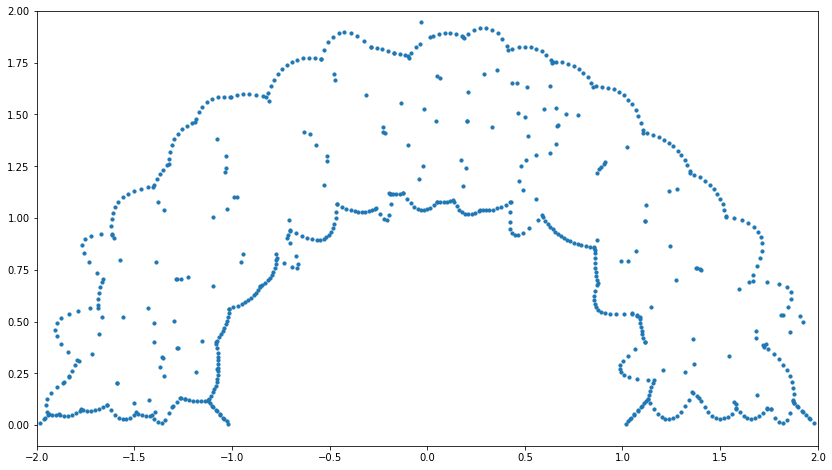

In [11]:
vor_vertices = vor_vertices[np.where(vor_vertices[:,1] >= 0)]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) >=r[0])]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) <=r[1])]
# hull = ConvexHull(vor_vertices)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], s=10)
plt.xlim([-2,2]); plt.ylim([-0.1,2])

*   ###  __Paso $N+1$:__ _Encontrando y discriminando las regiones de Voronoi_



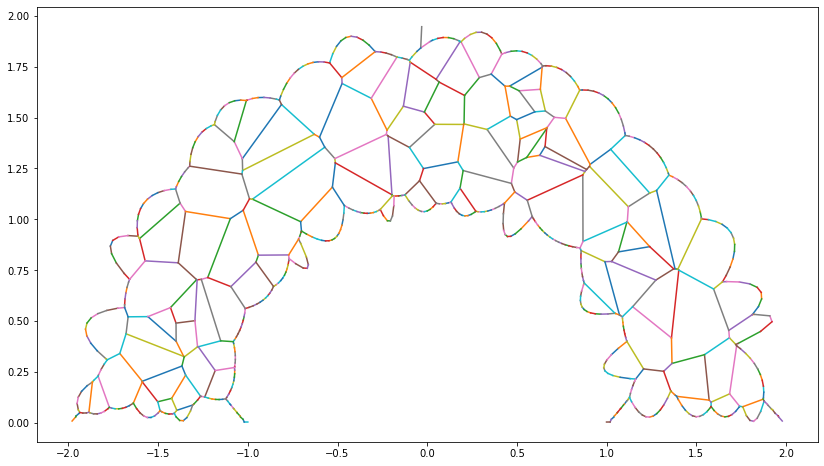

In [12]:
# fig,ax = plt.subplots();

finite_segments = []
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        finite_segments.append(vor.vertices[simplex])

for i in range(len(finite_segments)):
    x_line = finite_segments[i][:,0]
    y_line = finite_segments[i][:,1]
    r_line = (x_line**2 + y_line**2)**(1/2)
    if (np.min(r_line)>= r[0]-tol) and (np.max(r_line)<= r[1]+tol) and (np.min(y_line) >= -0.15):
        plt.plot(x_line, y_line)

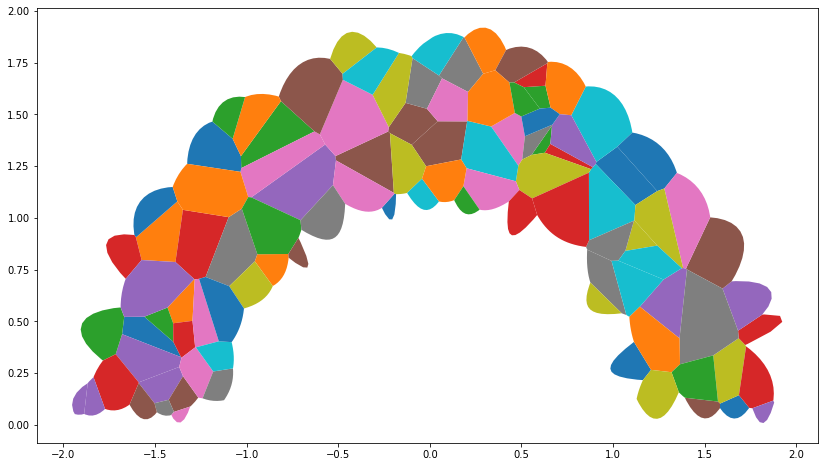

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

### make up data points
points = np.random.rand(15,2)

### compute Voronoi tesselation
vor = Voronoi(total)

### colorize
Polygons = []
for i in range(len(vor.regions)):
    if (not -1 in vor.regions[i]) and (len(vor.regions[i]) >=1):
        x_ = np.array([vor.vertices[k][0] for k in vor.regions[i]])
        y_ = np.array([vor.vertices[k][1] for k in vor.regions[i]])
        r_ = (x_**2+y_**2)**(1/2)
        if (np.min(r_) >= r[0] - tol) and (np.max(r_) <= r[1] + tol):
            polygon = np.array([vor.vertices[k] for k in vor.regions[i]])
            plt.fill(*zip(*polygon))
            Polygons.append(np.array([*zip(*polygon)]))

plt.show()

In [14]:
# len(Polygons)           # Número de polígonos guardados (coincide con el número de puntos dados)
# x[i] -> Polygons[i][0]
# y[i] -> Polygons[i][1]


*   ###  __Paso $N+2$:__ _Calculando el área y el centroide de un polígono_

\begin{align}
    A &= \frac{1}{2}\sum_{i=0}^{N-1} (x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Y para el cálculo de las coordenadas del centro de masas en 2D tenemos las siguientes ecuaciones

\begin{align}
    C_x &= \frac{1}{6A}\sum_{i=0}^{N-1}(x_i+x_{i+1})(x_iy_{i+1}-x_{i+1}y_i) \\
    C_y &= \frac{1}{6A}\sum_{i=0}^{N-1}(y_i+y_{i+1})(x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Para mayor información puede consultar el siguiente enlace: [Calculating the area and centroid of a polygon. By Paul Bourke](https://lexrent.eu/wp-content/uploads/torza/artikel_groep_sub_2_docs/BYZ_3_Polygon-Area-and-Centroid.pdf)

-----

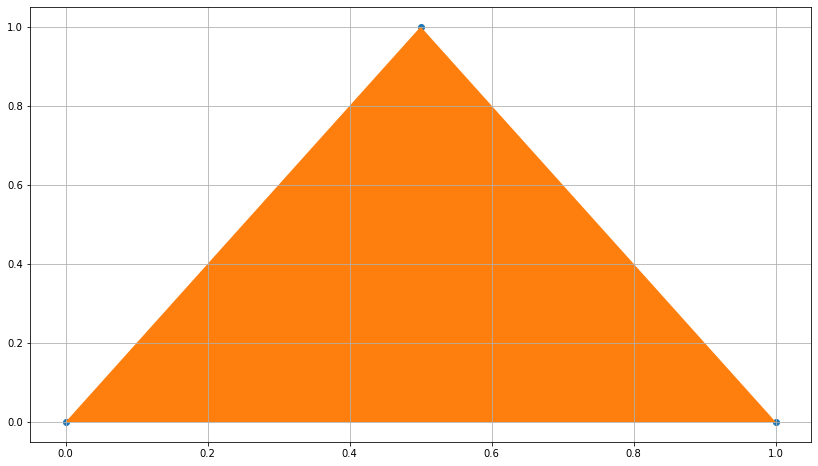

In [15]:
x_prueba = np.array([0,1,0.5])
y_prueba = np.array([0,0,1])

polygon_prueba = np.array([x_prueba, y_prueba])

plt.scatter(x_prueba, y_prueba); plt.fill(x_prueba, y_prueba)
plt.grid()

In [16]:
# len(Polygons)                   #50
# np.matrix(Polygons[0]).shape    #(2, 5)
Polygons[0].shape[1]

5

In [17]:
Polygons[0][1]

array([1.27019942, 1.34401185, 1.12921985, 1.06196029, 1.26030155])

In [18]:
def get_area(polygon):
    n_area = polygon.shape[1]
    X, Y = polygon
    S = np.empty(n_area)
    
    for i in range(n_area):
        S[i] = X [i]*Y[(i+1) % n_area] - X[(i+1) % n_area]*Y[i]
    return abs((1/2)*np.sum(S))

get_area(polygon_prueba)

0.5

In [19]:
def area_voronoi(Polygons):
    S = np.empty(len(Polygons))

    for i in range(len(S)):
        S[i] = get_area(Polygons[i])
    return S

area_voronoi(Polygons)

array([0.04130092, 0.04682986, 0.05193854, 0.06372181, 0.08218966,
       0.04886269, 0.05554312, 0.03282299, 0.01233883, 0.05863655,
       0.02819212, 0.01853677, 0.01248023, 0.01618861, 0.04579297,
       0.0318164 , 0.08150591, 0.02931729, 0.04211209, 0.07540046,
       0.04784143, 0.03145351, 0.00961215, 0.01092579, 0.02305399,
       0.07992135, 0.02718031, 0.05849273, 0.02903949, 0.03688194,
       0.01138582, 0.04046017, 0.00567562, 0.00823883, 0.0327687 ,
       0.04637352, 0.033833  , 0.02669558, 0.03862261, 0.03121115,
       0.04830558, 0.03932912, 0.0204831 , 0.01903478, 0.0415007 ,
       0.03105143, 0.02554626, 0.01059011, 0.05322985, 0.05662289,
       0.01728339, 0.05184389, 0.01522978, 0.07359761, 0.04550508,
       0.07063546, 0.06494524, 0.0988386 , 0.04772734, 0.03140992,
       0.02990279, 0.07985187, 0.04262881, 0.02771099, 0.07646805,
       0.01508847, 0.02630953, 0.00568353, 0.03733543, 0.01447883,
       0.00554935, 0.01877123, 0.059702  , 0.03737819, 0.00723

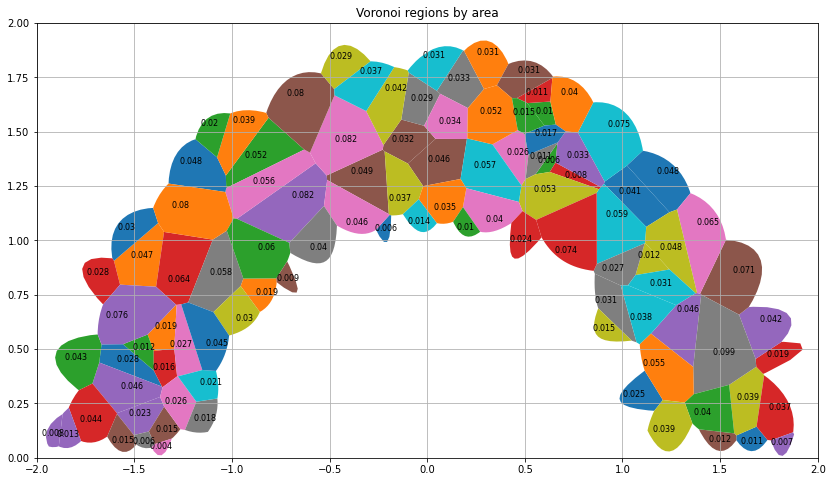

In [20]:
A_vor = area_voronoi(Polygons)

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    plt.text(np.mean(X), np.mean(Y), f'${num_label}$', fontsize=8, horizontalalignment='center', color='black', fontweight='bold')
    plt.fill(X, Y)

plt.title("Voronoi regions by area")
plt.xlim([-2.0, 2.0]); plt.ylim([-0.0, 2.0])
plt.grid()

---

Ahora se calcula el centroide de cada polígono

In [21]:
def get_centroid(polygon, tol = 0.05):
    n_centroid = polygon.shape[1]
    X, Y = polygon
    CX, CY = np.empty([2, n_centroid])
    A = get_area(polygon)
    
    for i in range(n_centroid):
        CX[i] = (X[i] + X[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
        CY[i] = (Y[i] + Y[(i+1) % n_centroid]) * (X[i] * Y[(i+1) % n_centroid] - X[(i+1) % n_centroid]*Y[i])
     
    cX, cY = (np.sum(CX), np.sum(CY))/(6*A) 
    if abs(cX - np.mean(X)) > abs(-cX - np.mean(X)):
        cX = -cX
    if abs(cY - np.mean(Y)) > abs(-cY - np.mean(Y)):
        cY = -cY
    return cX, cY

get_centroid(polygon_prueba)

(0.5, 0.3333333333333333)

In [22]:
def centroid_voronoi(Polygons):
    C = np.empty([2, len(Polygons)])
    for i in range(C.shape[1]):
        C[:,i] = get_centroid(Polygons[i])
    return C

centroid_voronoi(Polygons)

array([[ 1.07033479, -1.46178451, -0.84033323, -1.26030197, -0.70033619,
        -0.31620749, -0.82355117,  0.1771398 ,  1.14070387,  0.96700776,
        -1.53731204, -1.34519426, -1.45714489, -1.34175156, -1.55224366,
        -0.09823635, -0.42225088, -0.04408399, -0.19443187,  0.93677172,
         1.19723449,  0.30687531,  0.59731465,  0.57124548, -1.45968578,
        -0.64096683, -1.24120449, -1.07388376, -0.43017346, -0.32189512,
         1.66172288,  0.72836863,  0.62312217,  0.73895578,  0.76969722,
         0.0653105 ,  0.10684244,  0.99178774,  1.63461034,  0.04250932,
        -1.17609236, -0.96191789, -1.09578311,  1.79518247,  1.73019418,
         0.49035492,  0.44799383,  0.56724529,  0.63422337,  0.31401601,
         0.59443399,  0.32911502,  0.50419861,  0.74701339,  1.30156869,
         1.57311803,  1.40226851,  1.50034647,  1.2485372 ,  1.20689064,
        -1.51074658, -1.19764712, -1.77897171, -1.66794532, -1.51135959,
        -1.34810972, -1.27514587, -1.44833953, -0.1

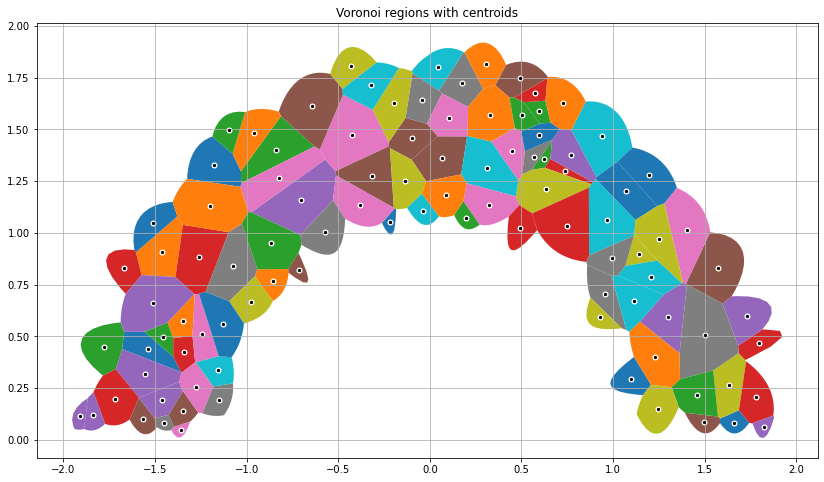

In [23]:
C_vor = centroid_voronoi(Polygons);

fig, ax = plt.subplots();

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(get_area(Polygons[i]), 3)
    # plt.text(np.mean(X), np.mean(Y), f'${num_label}$', fontsize=8, horizontalalignment='center', color='black', fontweight='bold')
    ax.fill(X, Y, zorder=-2)
ax.scatter(C_vor[0], C_vor[1], color="white", zorder=1, s=25)
ax.scatter(C_vor[0], C_vor[1], color="black", zorder=2, s=5)

plt.title("Voronoi regions with centroids")
# plt.xlim([-2.0, 2.0]); plt.ylim([-0.0, 2.0])
plt.grid()

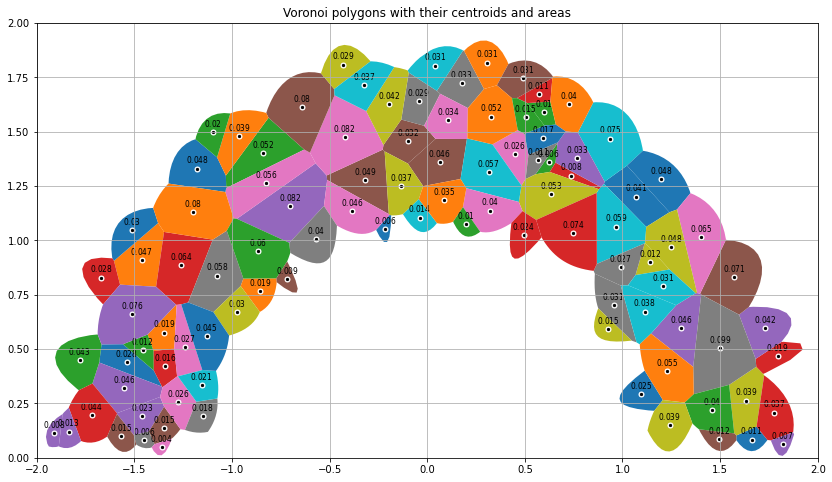

In [28]:
A_vor = area_voronoi(Polygons);
C_vor = centroid_voronoi(Polygons);

fig, ax = plt.subplots();

for i in range(len(Polygons)):
    X, Y = Polygons[i]
    num_label = round(A_vor[i], 3)
    ax.text(C_vor[0,i], C_vor[1,i]+0.025, f'${num_label}$', fontsize=7.5, horizontalalignment='center', color='black', fontweight='bold', zorder=1)
    ax.fill(X, Y, zorder=-2)

ax.scatter(C_vor[0], C_vor[1], color="white", zorder=-1, s=25); ax.scatter(C_vor[0], C_vor[1], color="black", zorder=0, s=5)
ax.set_title("Voronoi polygons with their centroids and areas")
ax.set_xlim([-2.0, 2.0]); ax.set_ylim([-0.0, 2.0])
ax.grid()

*   ###  __Paso $N+3$:__ _Definiendo las interacciones y evolución del sistema a partir del potencial $V(\vec{x},t)$_

\begin{align}
    V(\vec{r_i}, t) = \frac{K_v}{2}\left(A_i(t)-A_0(t)\right)^2 + \frac{K_c}{2}\big|\vec{r}_i(t) - \vec{r}_{0,i}(t)\big|^2 
\end{align}

donde $A_0 = \sum_{i=1}^N(A_i/N)$

\begin{align}
    F_x(x_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(x_i-x_m)\dot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(x_i-x_{0,i})\\
    F_y(y_i, t) = &-\frac{K_v}{2}\left[\frac{1}{2}\sum_{m=1}^{M} \frac{(y_i-y_m)\dot l_{i,m}}{|\vec{r}_i-\vec{r}_m|}\{A_i - A_0\}\right]\\
                  &- K_c(y_i-y_{0,i})  
\end{align}

[Cell Patterns Emerge from Coupled Chemical and Physical Fields with Cell Proliferation Dynamics: The Arabidopsis thaliana Root as a Study System](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3642054/)